In [1]:
%matplotlib inline
from sympy import init_printing

# Catalysed Reaction with Reaction Builder

### Reaction Networks.
Here we use the bond graph tools 'biochem' addon to build a reaction network and automatically lay out the bond graph.

After making a new reaction network object, we add the reaction sequence "X + S = SX +X +P", as well as a chemostat to hold X at a fixed concentration, and a flowstat to siphon off a fixed amount of P. (Note that parameterization is not yet implemented).

Once the entire reaction is specified, the bond graph can generated.

In [2]:
from BondGraphTools.addons.biochem import Reaction_Network
rn = Reaction_Network(name="Cycle")
rn.add_reaction("X + S = SX = X + P")
rn.add_chemostat("X")
rn.add_flowstat("P")
graph = rn.bond_graph

### Bond Graph Visualisation.

Generation of the bond graph does not automatically produce a layout, instead that must be performed later.
Indeed, generating 'nice' visualisation of bond graphs is as hard as 'The Metro Map Problem', automatic circuit schematic layout, and other well know graph visualisation problems. 

Currently, the branch and bound algorithm seems to work best

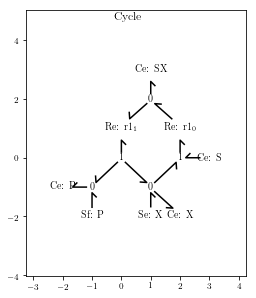

In [6]:
from BondGraphTools.core.layout_manager import arrange, force_directed, branch_and_bound
from BondGraphTools.transforms.matplotlib import draw
arrange(graph, algorithm=branch_and_bound)
fig = draw(graph)

In [4]:
from BondGraphTools.transforms.latex import bondgraph_to_sympy, reduce

init_printing()
dx, x, A, B, J, NL = bondgraph_to_sympy(graph)
s, n = reduce(dx, x, A, B, J, NL)

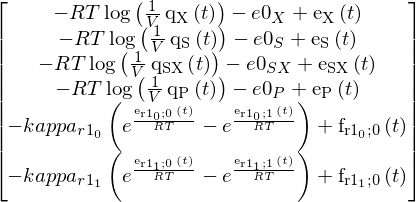

In [5]:
NL